In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import optimize
from scipy import stats
from scipy import interpolate
plt.style.use(r"/home/vladimir/BOTAY!/Labs/jupyter_template/style.mplstyle")

### Лазер эксперимент 1

<>:35: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_426087/3101524547.py:35: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_426087/3101524547.py:35: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_426087/3101524547.py:35: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',


d = 994.4645887472846 нм


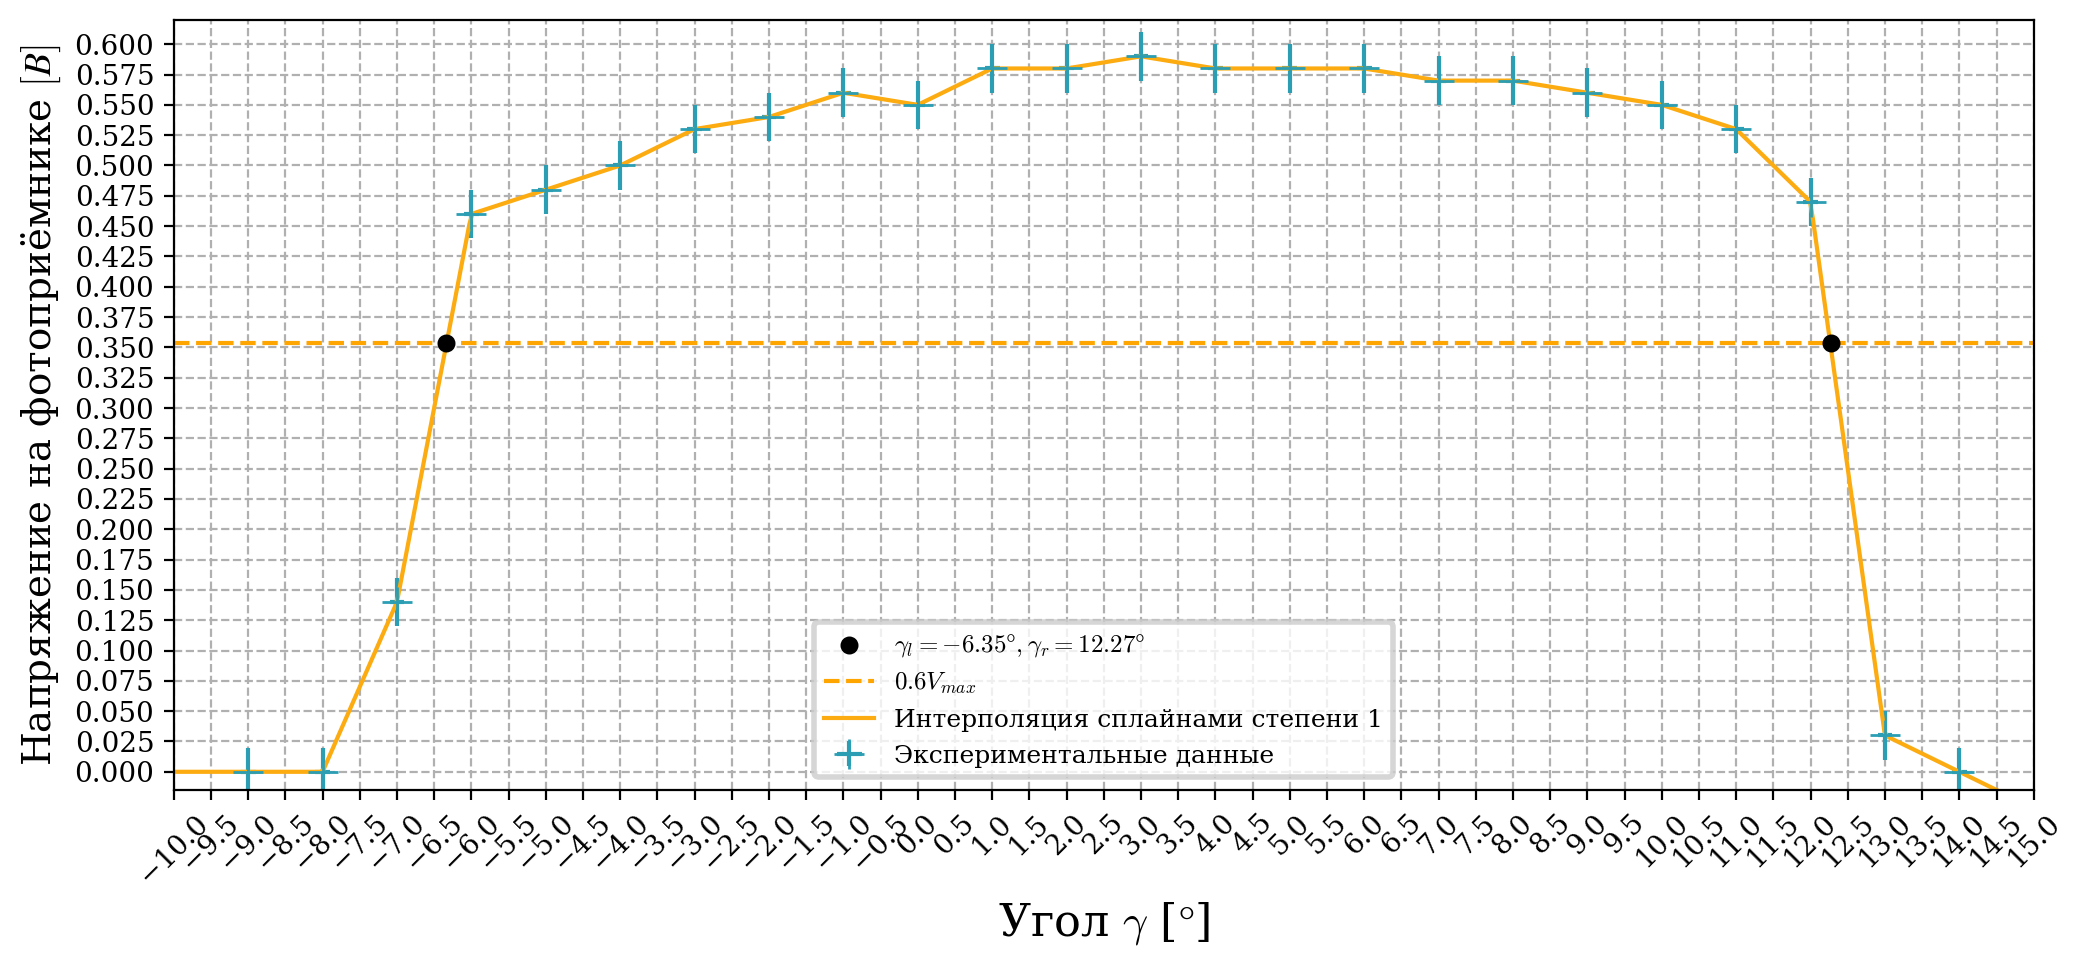

In [4]:


data = pd.read_csv("lazer_horizontal_65_muA.csv")



plt.errorbar(data['angle[deg]'], 
             data['amp[V]'], 
             xerr = np.ones_like(data['angle[deg]']) * 0.1,
             yerr = np.ones_like(data['angle[deg]']) * 0.02,
             label = 'Экспериментальные данные',
             fmt = '+')

v = data['amp[V]'].to_numpy()
ang = data['angle[deg]'].to_numpy()

ang_sort_indices = np.argsort(ang)


spline_f = interpolate.UnivariateSpline(ang[ang_sort_indices], v[ang_sort_indices], s = 0, k = 1)
phi_line = np.linspace(-20, 20, 1000)
voltage_spline = spline_f(phi_line)


max_intensity = np.max(voltage_spline)

left_mask = phi_line < 3.0
right_mask = phi_line > 3.0

angle_left = phi_line[left_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[left_mask])]
angle_right = phi_line[right_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[right_mask])]

plt.scatter([angle_left], [0.6 * max_intensity],color = 'black', zorder = 10, s = 20);
plt.scatter([angle_right],  
            [0.6 * max_intensity], 
            color = 'black', 
            label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$', 
            zorder = 10, s = 20);

plt.axhline(0.6 * max_intensity, color = 'orange', linestyle = '--', label = r'$0.6 V_{max}$')

plt.xlabel(r"Угол $\gamma$ [$\degree$]")
plt.ylabel(r"Напряжение на фотоприёмнике $[В]$", fontsize = 14)


plt.plot(phi_line, voltage_spline, label = 'Интерполяция сплайнами степени 1')

plt.xticks(np.arange(-20, 20, 0.5), rotation = 45)
plt.xlim(-10, 15)
plt.yticks(np.arange(0, 0.7, 0.025))
plt.ylim(-0.015, 0.62)


plt.legend(fontsize = 9)


print(f"d = {635 / (2 * np.sin((angle_right - angle_left) * np.pi / 180))} нм")


plt.savefig(r"Отчет/pics/lazer_horizonta_65.png", bbox_inches = 'tight')

### 2

<>:35: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\g'
<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_426087/3939746068.py:35: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_426087/3939746068.py:35: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_426087/3939746068.py:35: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',


d = 951.172282709868 нм


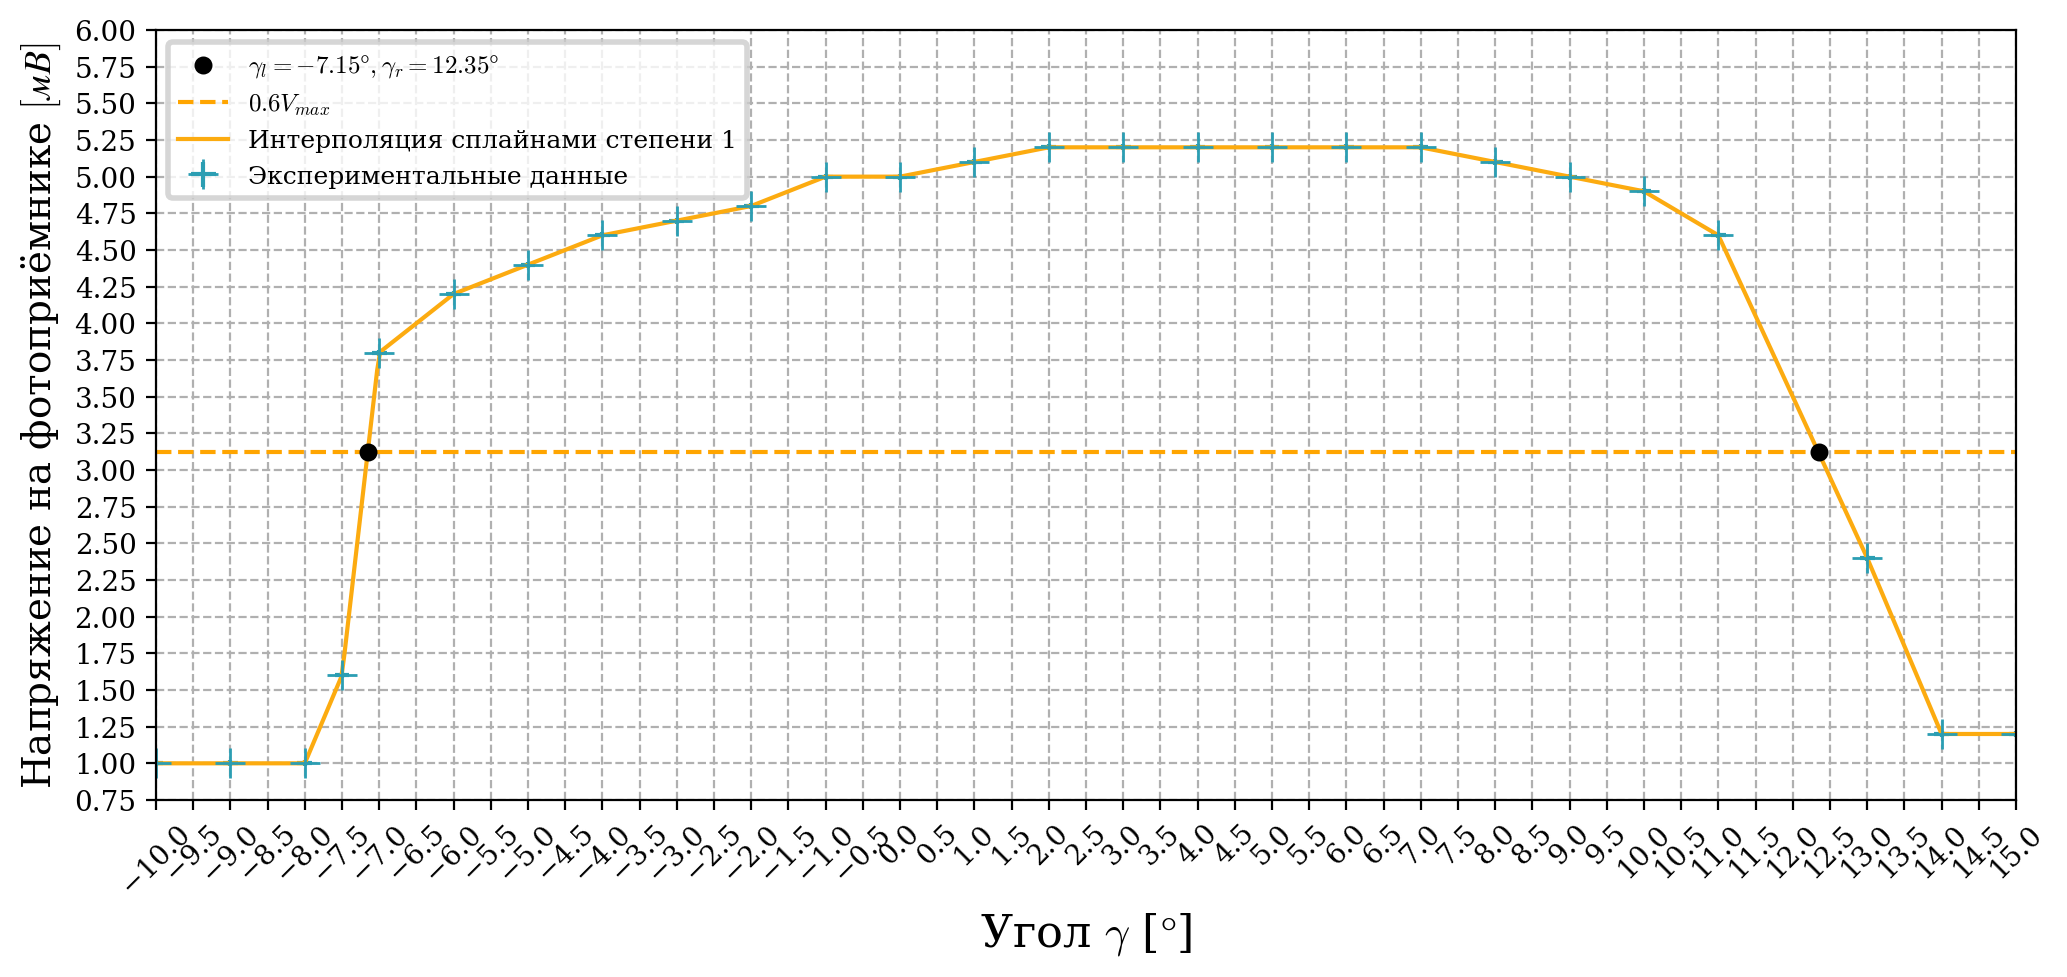

In [5]:

data = pd.read_csv("lazer_horizontal_51_muA.csv")

v = data['amp[mV]'].to_numpy()
ang = data['angle[deg]'].to_numpy()



plt.errorbar(ang, 
             v, 
             xerr = np.ones_like(ang) * 0.1,
             yerr = np.ones_like(ang) * 0.02,
             label = 'Экспериментальные данные',
             fmt = '+')

ang_sort_indices = np.argsort(ang)


spline_f = interpolate.UnivariateSpline(ang[ang_sort_indices], v[ang_sort_indices], s = 0, k = 1)
phi_line = np.linspace(-20, 20, 1000)
voltage_spline = spline_f(phi_line)


max_intensity = np.max(voltage_spline)

left_mask = phi_line < 3.0
right_mask = phi_line > 3.0

angle_left = phi_line[left_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[left_mask])]
angle_right = phi_line[right_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[right_mask])]

plt.scatter([angle_left], [0.6 * max_intensity],color = 'black', zorder = 10, s = 20);
plt.scatter([angle_right],  
            [0.6 * max_intensity], 
            color = 'black', 
            label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$', 
            zorder = 10, s = 20);

plt.axhline(0.6 * max_intensity, color = 'orange', linestyle = '--', label = r'$0.6 V_{max}$')

plt.xlabel(r"Угол $\gamma$ [$\degree$]")
plt.ylabel(r"Напряжение на фотоприёмнике $[мВ]$", fontsize = 14)


plt.plot(phi_line, voltage_spline, label = 'Интерполяция сплайнами степени 1')


plt.xticks(np.arange(-20, 20, 0.5), rotation = 45)
plt.xlim(-10, 15)
plt.yticks(np.arange(0, 10, 0.25))
plt.ylim(0.75, 6)


plt.legend(fontsize = 9)

print(f"d = {635 / (2 * np.sin((angle_right - angle_left) * np.pi / 180))} нм")
plt.savefig(r'Отчет/pics/lazer_horizontal_51.png', bbox_inches = 'tight')

### Вертикально

<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_297675/3238668363.py:37: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_297675/3238668363.py:37: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_297675/3238668363.py:37: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',


d = 3201.9581277064653 нм


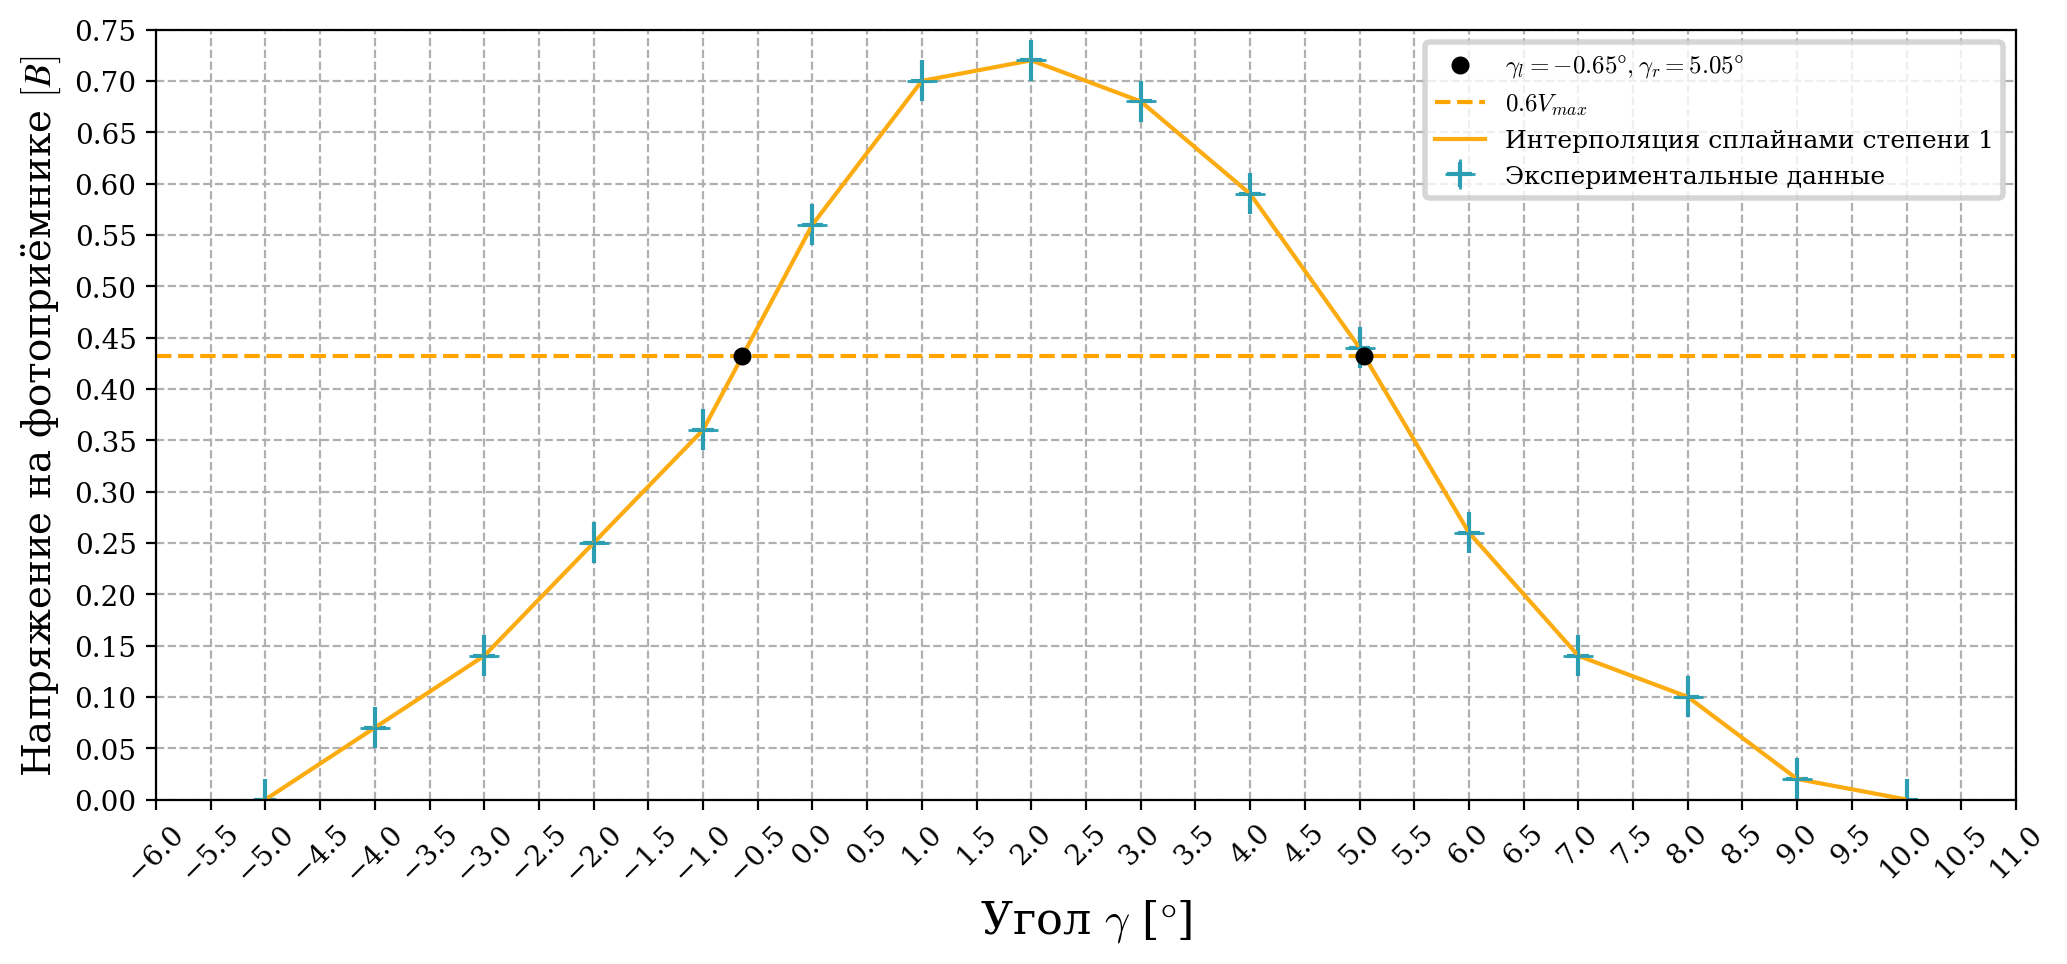

In [ ]:


data = pd.read_csv("lazer_vertical_65_muA.csv")

v = data['amp[V]'].to_numpy()
ang = data['angle[deg]'].to_numpy()





plt.errorbar(ang, 
             v, 
             xerr = np.ones_like(ang) * 0.1,
             yerr = np.ones_like(ang) * 0.02,
             label = 'Экспериментальные данные',
             fmt = '+')

ang_sort_indices = np.argsort(ang)


spline_f = interpolate.UnivariateSpline(ang[ang_sort_indices], v[ang_sort_indices], s = 0, k = 1)
phi_line = np.linspace(-5, 10, 1000)
voltage_spline = spline_f(phi_line)


max_intensity = np.max(voltage_spline)

left_mask = phi_line < 3.0
right_mask = phi_line > 3.0

angle_left = phi_line[left_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[left_mask])]
angle_right = phi_line[right_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[right_mask])]

plt.scatter([angle_left], [0.6 * max_intensity],color = 'black', zorder = 10, s = 20);
plt.scatter([angle_right],  
            [0.6 * max_intensity], 
            color = 'black', 
            label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$', 
            zorder = 10, s = 20);

plt.axhline(0.6 * max_intensity, color = 'orange', linestyle = '--', label = r'$0.6 V_{max}$')

plt.xlabel(r"Угол $\gamma$ [$\degree$]")
plt.ylabel(r"Напряжение на фотоприёмнике $[В]$", fontsize = 14)


plt.plot(phi_line, voltage_spline, label = 'Интерполяция сплайнами степени 1')


plt.xticks(np.arange(-20, 20, 0.5), rotation = 45)

plt.yticks(np.arange(0, 0.85, 0.05))
plt.ylim(0, 0.75)
plt.xlim(-6, 11)


plt.legend(fontsize = 9)


print(f"d = {635 / (2 * np.sin((angle_right - angle_left) * np.pi / 180))} нм")




plt.savefig(r'Отчет/pics/vertical_65_muA.png', bbox_inches = 'tight')

<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\g'
<>:37: SyntaxWarning: invalid escape sequence '\d'
<>:37: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_297675/3524476675.py:37: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_297675/3524476675.py:37: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',
/tmp/ipykernel_297675/3524476675.py:37: SyntaxWarning: invalid escape sequence '\d'
  label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$',


d = 2564.387339737737 нм


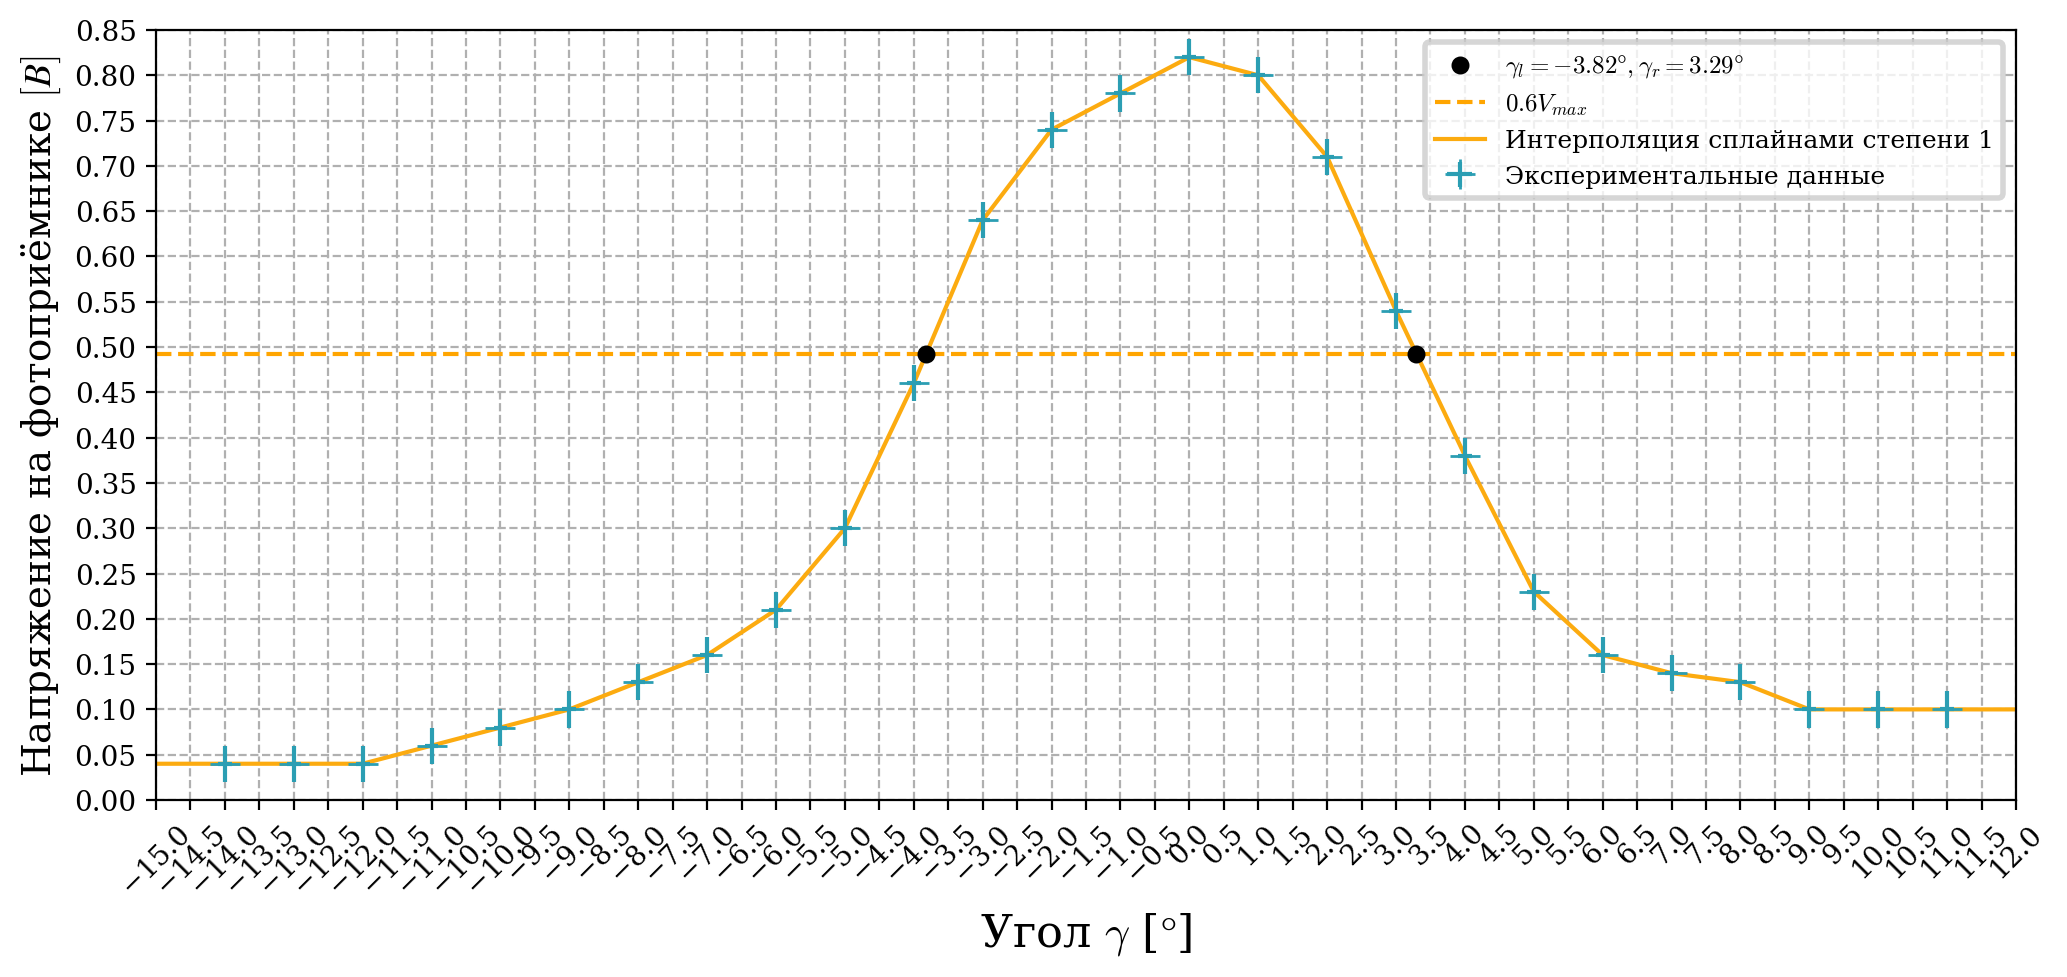

In [ ]:
data = pd.read_csv("diode_70_muA.csv")

v = data['amp[.1V]'].to_numpy() / 100
ang = data['angle[deg]'].to_numpy()




plt.errorbar(ang, 
             v, 
             xerr = np.ones_like(ang) * 0.1,
             yerr = np.ones_like(ang) * 0.02,
             label = 'Экспериментальные данные',
             fmt = '+',
             zorder = 10)

ang_sort_indices = np.argsort(ang)


spline_f = interpolate.UnivariateSpline(ang[ang_sort_indices], v[ang_sort_indices], s = 0, k = 1)
phi_line = np.linspace(-15, 20, 1000)
voltage_spline = spline_f(phi_line)


max_intensity = np.max(voltage_spline)

left_mask = phi_line < 3.0
right_mask = phi_line > 3.0

angle_left = phi_line[left_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[left_mask])]
angle_right = phi_line[right_mask][np.argmin(np.abs(voltage_spline - 0.6 * max_intensity)[right_mask])]

plt.scatter([angle_left], [0.6 * max_intensity],color = 'black', zorder = 10, s = 20);
plt.scatter([angle_right],  
            [0.6 * max_intensity], 
            color = 'black', 
            label = f'$\gamma_l = {angle_left:.2f} \degree, \gamma_r = {angle_right:.2f} \degree$', 
            zorder = 10, s = 20);

plt.axhline(0.6 * max_intensity, color = 'orange', linestyle = '--', label = r'$0.6 V_{max}$')

plt.xlabel(r"Угол $\gamma$ [$\degree$]")
plt.ylabel(r"Напряжение на фотоприёмнике $[В]$", fontsize = 14)


plt.plot(phi_line, voltage_spline, label = 'Интерполяция сплайнами степени 1')

color = 'blue'
plt.xticks(np.arange(-20, 20, 0.5), rotation = 45)

plt.yticks(np.arange(0, 1.85, 0.05))
plt.ylim(0, 0.85)


plt.legend(fontsize = 9)


print(f"d = {635 / (2 * np.sin((angle_right - angle_left) * np.pi / 180))} нм")


plt.xlim(-15, 12)

plt.savefig(r'Отчет/pics/diode.png', bbox_inches = 'tight')

### Модельные кривые

<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\g'
<>:48: SyntaxWarning: invalid escape sequence '\d'
<>:51: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_297675/903919707.py:48: SyntaxWarning: invalid escape sequence '\g'
  label = f'Сдвинутая модельная кривая $(S(\gamma, h) / max_{{\gamma}} S(\gamma, h))^2$\nСдвиг $s = {optimized_params[1]:.2f}^{{\degree}}$\nТолщина активного слоя $h = {optimized_params[0]:.2f} мкм$')
/tmp/ipykernel_297675/903919707.py:48: SyntaxWarning: invalid escape sequence '\g'
  label = f'Сдвинутая модельная кривая $(S(\gamma, h) / max_{{\gamma}} S(\gamma, h))^2$\nСдвиг $s = {optimized_params[1]:.2

[ 3.21602243 -2.10931979]


Text(0, 0.5, 'Интенсивность $[отн.ед.]$')

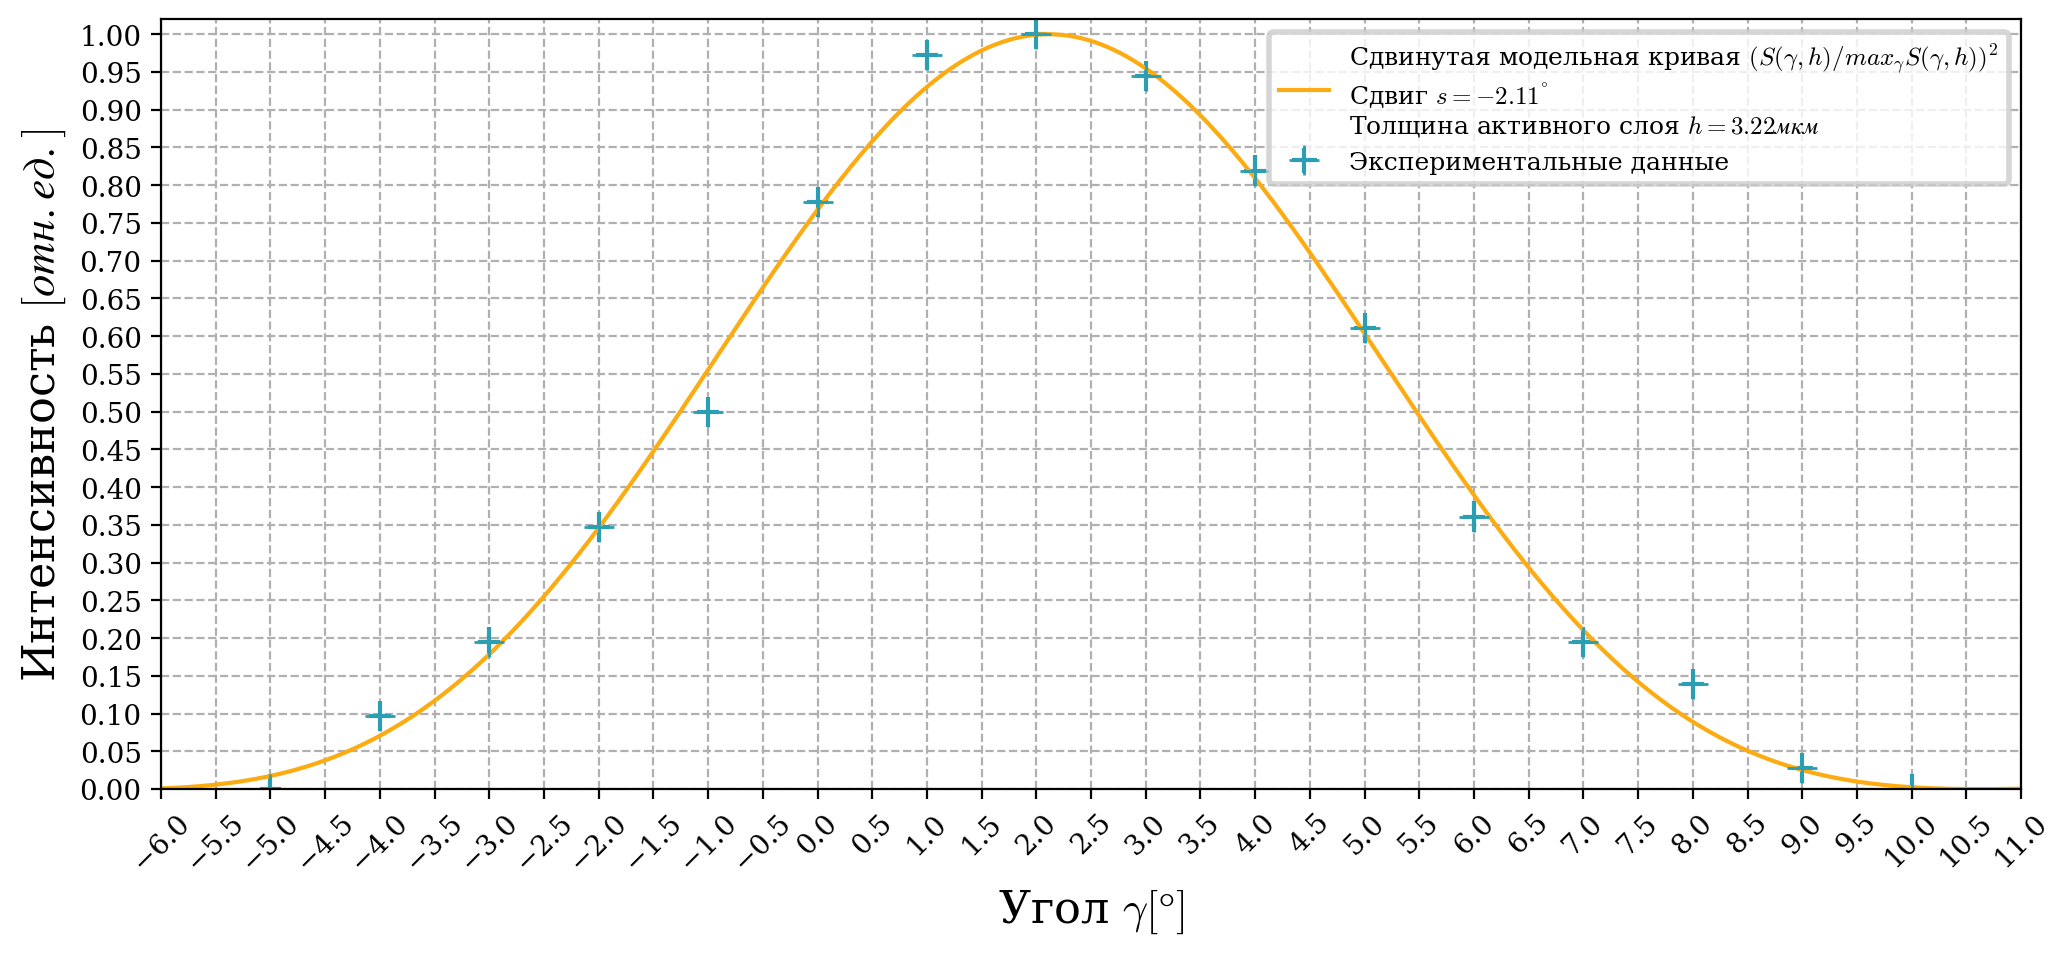

In [ ]:




data = pd.read_csv("lazer_vertical_65_muA.csv")


v = data['amp[V]'].to_numpy()
ang = data['angle[deg]'].to_numpy()
v /= np.max(v)


plt.errorbar(data['angle[deg]'], 
             data['amp[V]'], 
             xerr = np.ones_like(data['angle[deg]']) * 0.1,
             yerr = np.ones_like(data['angle[deg]']) * 0.02,
             label = 'Экспериментальные данные',
             fmt = '+')



S_numerator = lambda phi, d, lamb, shift: np.cos(np.pi * d * np.sin(phi + shift) / lamb)
S_denominator = lambda phi, d, lamb, shift: np.power(lamb / (2 * d), 2) - np.power(np.sin(phi + shift), 2)
S = lambda phi, d, shift: S_numerator(np.pi * phi / 180, 2* d * 1e-6, 0.635 * 1e-6, np.pi * shift / 180) / S_denominator(np.pi * phi / 180, 2 * d * 1e-6, 0.635 * 1e-6, np.pi * shift / 180)


def loss(params):
    S_vals = S(ang, *params)**2
    S_vals = (S_vals - np.min(S_vals)) / (np.max(S_vals) - np.min(S_vals))  
    return np.sum((S_vals - v) ** 2)  


initial_params = [3.2,  -3]

phi_line = np.linspace(-10, 20, 1000)
result = optimize.minimize(loss, initial_params, method='Nelder-Mead')
optimized_params = result.x
s = S(phi_line, *optimized_params)**2
s/=np.max(s)

print(optimized_params)

plt.xticks(np.arange(-20, 20, 0.5), rotation = 45)

plt.yticks(np.arange(0, 2, 0.05))
plt.ylim(0, 1.02)
plt.xlim(-6, 11)


plt.plot(phi_line, s, 
         label = f'Сдвинутая модельная кривая $(S(\gamma, h) / max_{{\gamma}} S(\gamma, h))^2$\nСдвиг $s = {optimized_params[1]:.2f}^{{\degree}}$\nТолщина активного слоя $h = {optimized_params[0]:.2f} мкм$')

plt.legend(fontsize = 9)
plt.xlabel("Угол $\gamma [\degree]$")
plt.ylabel("Интенсивность $[отн.ед.]$")